In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics

In [2]:
dataset = pd.read_csv('CC GENERAL.csv') #importing data

In [3]:
dataset.head() #first few rows of the dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
#Question 2(a)
#droping the unwanted data
dataset = dataset.drop("CUST_ID", axis=1)

In [6]:
#checking for Null values
dataset.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
dataset = dataset.fillna(dataset.mean()) #filling null values with mean values

In [8]:
#question 2(b)
#Doing feature scaling for dataset
scaler = StandardScaler()
X_Scale = scaler.fit_transform(dataset)
print(X_Scale)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


In [15]:
#Normalized the scalled data
x_norm = preprocessing.normalize(X_Scale)

In [17]:
print(x_norm)

[[-0.31193826 -0.10629684 -0.1810716  ... -0.13251924 -0.22396426
   0.15370408]
 [ 0.21992533  0.03753859 -0.13122171 ...  0.02495877  0.06545742
   0.10079608]
 [ 0.12668203  0.14678317 -0.03050449 ... -0.02880315 -0.14889876
   0.10218749]
 ...
 [-0.1569743  -0.03932355 -0.085222   ... -0.07112317  0.0697948
  -0.87408185]
 [-0.15431961 -0.03841074 -0.09724043 ... -0.07184155  0.06817468
  -0.85379209]
 [-0.11520725 -0.17888144  0.00848011 ... -0.06699181 -0.10574557
  -0.82953785]]


In [18]:
X_norm = pd.DataFrame(x_norm) #converting data into pandas dataset
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-1.841058e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400


In [19]:
#Question 2(c)
pca = PCA(2)#applying PCA and took K(components)=2
x_pca = pca.fit_transform(X_norm)
x_pca = pd.DataFrame(x_pca) #converting into pandas dataframe
x_pca.columns = ['P1','P2']

In [20]:
x_pca.head() #output of the PCA after reducing in to 2 columns

,P1,P2
0,-0.489825,-0.679679
1,-0.518791,0.545010
2,0.330885,0.268977
3,-0.482374,-0.092111
4,-0.563289,-0.481915


In [21]:
#Question 2(d)
from sklearn.cluster import AgglomerativeClustering
AC2 = AgglomerativeClustering(2) #applying agglomerative clustering where k =2
a = AC2.fit_predict(x_pca)

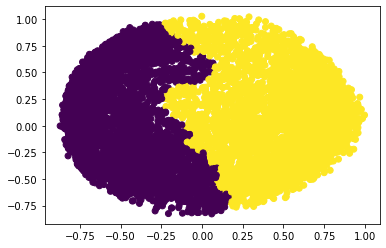

In [22]:
plt.scatter(x_pca['P1'],x_pca['P2'],c = a,cmap='viridis')
plt.show()

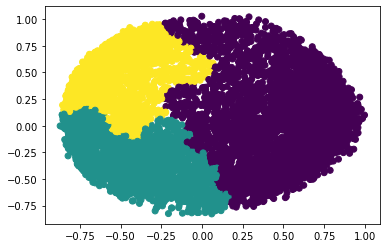

In [23]:
AC3 = AgglomerativeClustering(3) #applying agglomerative clustering where k =3
a = AC3.fit_predict(x_pca)
plt.scatter(x_pca['P1'],x_pca['P2'],c = a,cmap='viridis')
plt.show()

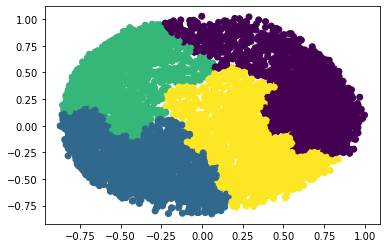

In [24]:
AC4 = AgglomerativeClustering(4) #applying agglomerative clustering where k =4
a = AC4.fit_predict(x_pca)
plt.scatter(x_pca['P1'],x_pca['P2'],c = a,cmap='viridis')
plt.show()

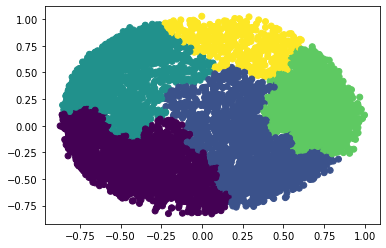

In [25]:
AC5 = AgglomerativeClustering(5) #applying agglomerative clustering where k =5
a = AC5.fit_predict(x_pca)
plt.scatter(x_pca['P1'],x_pca['P2'],c = a,cmap='viridis')
plt.show()

In [32]:
#Question 2(e)
 
# calculating silhouette scores of the different clusters
s2 = metrics.silhouette_score(x_pca, AC2.fit_predict(x_pca))
s3 = metrics.silhouette_score(x_pca, AC3.fit_predict(x_pca))
s4 = metrics.silhouette_score(x_pca, AC4.fit_predict(x_pca))
s5 = metrics.silhouette_score(x_pca, AC5.fit_predict(x_pca))

ss = []
ss.append (s2)
ss.append (s3)
ss.append (s4)
ss.append (s5)
 
print(s2,s3,s4,s5)

0.43732427095420684 0.41672295136762405 0.3531061486482418 0.3505507532862584


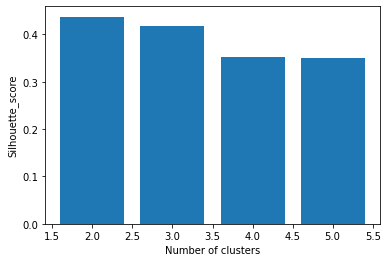

In [33]:
# Plotting graph to compare the silhouette score
k = [2, 3, 4, 5]
plt.bar(k, ss)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_score')
plt.show()